In [1]:
import pandas as pd
import os
import csv
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Change directory to where you want files saved
os.chdir('E:/School/Spring25/CSC522/Project/')

# File containing all data
data = pd.read_csv("combined_data.csv")

X = pd.DataFrame(data)

# Drop the response from X
X.drop("FIRE", axis = 1, inplace = True)
X.drop("Date", axis = 1, inplace = True)

# Assign y to the 'FIRE' column in data
y = data['FIRE']

# Set seed for reproducability
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X, y, data, test_size = 0.2, random_state = 1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/School/Spring25/CSC522/Project/'

,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1,Training ROC,Eval ROC
0,Random Forest,0.999958,0.974958,1.0,0.979564,0.999917,0.969656,0.999958,0.974585,1.0,0.994232



Training Random Forest...


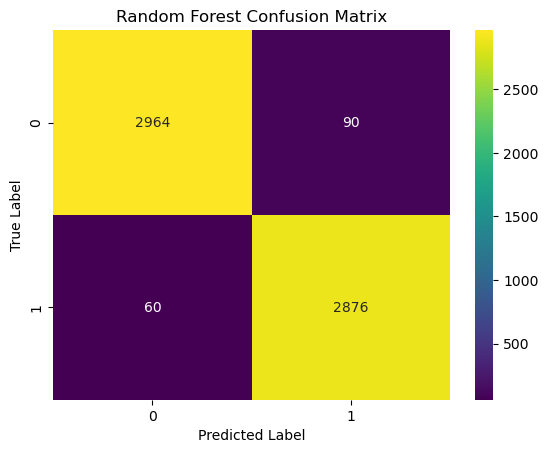

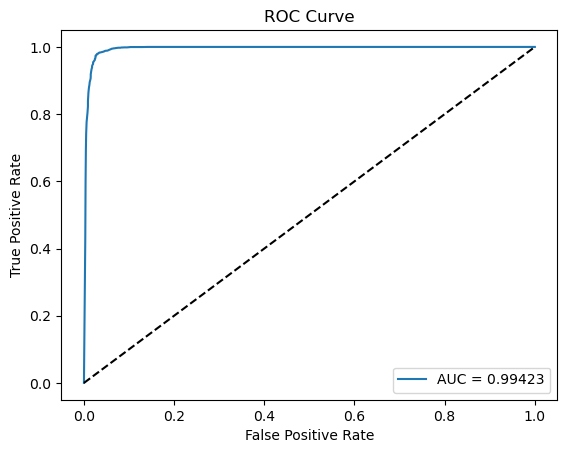

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score, roc_curve, classification_report,
                            confusion_matrix, ConfusionMatrixDisplay)

# Evaluates pipelines passed
def evaluate_pipelines(pipelines, X_train, y_train, X_evaluate, y_evaluate):
    rows = []
    for name, pipeline in pipelines:
        pipeline.fit(X_train, y_train)

        train_preds = pipeline.predict(X_train)
        test_preds = pipeline.predict(X_test)

        training_accuracy = accuracy_score(y_train, train_preds)
        testing_accuracy = accuracy_score(y_test, test_preds)

        training_recall = recall_score(y_train, train_preds)
        testing_recall = recall_score(y_test, test_preds)

        training_precision = precision_score(y_train, train_preds)
        testing_precision = precision_score(y_test, test_preds)

        training_f1 = f1_score(y_train, train_preds)
        testing_f1 = f1_score(y_test, test_preds)

        train_probs = pipeline.predict_proba(X_train)[:,1]
        test_probs = pipeline.predict_proba(X_test)[:,1]

        training_roc = roc_auc_score(y_train, train_probs)
        testing_roc = roc_auc_score(y_test, test_probs)

        rows.append({'name': name, 'Training Accuracy': training_accuracy, 'Eval Accuracy': testing_accuracy,
                     'Training Recall': training_recall, 'Eval Recall': testing_recall,
                     'Training Precision': training_precision, 'Eval Precision': testing_precision,
                     'Training F1': training_f1, 'Eval F1': testing_f1, 'Training ROC': training_roc, 'Eval ROC': testing_roc})

    display(pd.DataFrame(rows))

# Plots confusion matrix
def plot_confusion_matrix(y_true, y_pred, clf_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure
    plt.figure()

    # Use seaborn to plot confusion matrix
    sns.heatmap(cm, annot = True, fmt = 'g', cmap='viridis')

    # Labels/title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{clf_name} Confusion Matrix')

    # Display plot
    plt.show()

def plot_roc_curve(y_test, y_probs):

  #calculate auc
  auc = roc_auc_score(y_test, y_probs)

  #plot
  fpr, tpr, _ = roc_curve(y_test, y_probs)
  plt.plot(fpr, tpr, label=f"AUC = {auc:.5f}")
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()

random_forest = make_pipeline(RandomForestClassifier(random_state = 1234))

evaluate_pipelines([
    ('Random Forest', random_forest),
], X_train, y_train, X_test, y_test)

# CLFs to plot confusion matrix for
clfs = [('Random Forest', random_forest)]

for name, clf in clfs:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:,1]
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_probs)


## Hyperparameter Tuning

Tune Random Forest based on the following parameters:
- max_depth
- min_samples_leaf

Utilize Cross-Validation for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for search space
param_grid = {'max_depth': [20, 21, 22, 23, 24, 25], 'min_samples_leaf': [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 1234),
                           param_grid = param_grid,
                           cv=5,
                           scoring='roc_auc_ovo')

grid_search.fit(X_train, y_train)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_leaf'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Grid Search CV Results (ROC)')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()


KeyboardInterrupt



# Logistic Regression

Let's repeat the steps above for the logistic regression model.

,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1,Training ROC,Eval ROC
0,Logistic Regression,0.946035,0.945576,0.9573,0.955381,0.936487,0.935,0.946779,0.945081,0.985928,0.984835



Training Logistic Regression...


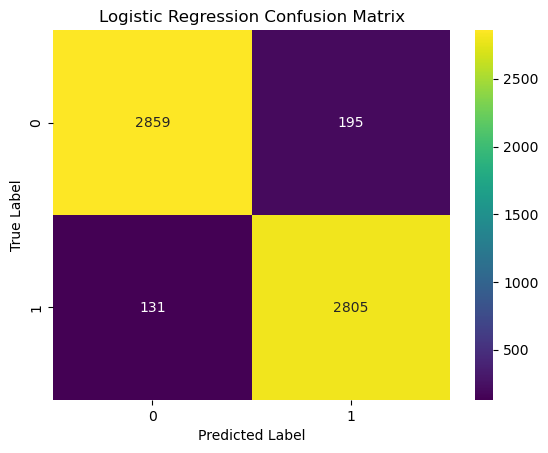

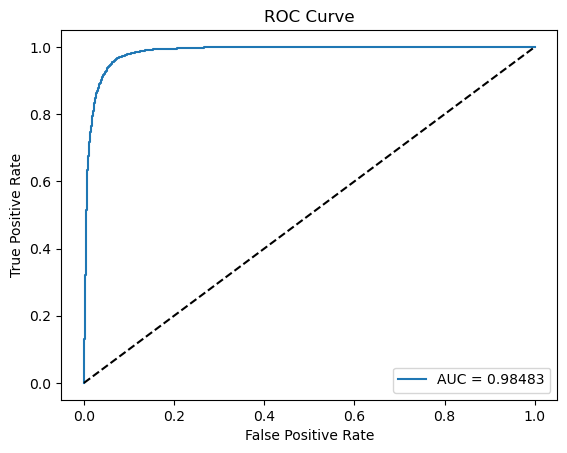

In [ ]:
logistic_regression = make_pipeline(LogisticRegression(random_state = 1234, max_iter = 10000))

evaluate_pipelines([
    ('Logistic Regression', logistic_regression),
], X_train, y_train, X_test, y_test)

# CLFs to plot confusion matrix for
clfs = [('Logistic Regression', logistic_regression)]

for name, clf in clfs:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:,1]
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_probs)

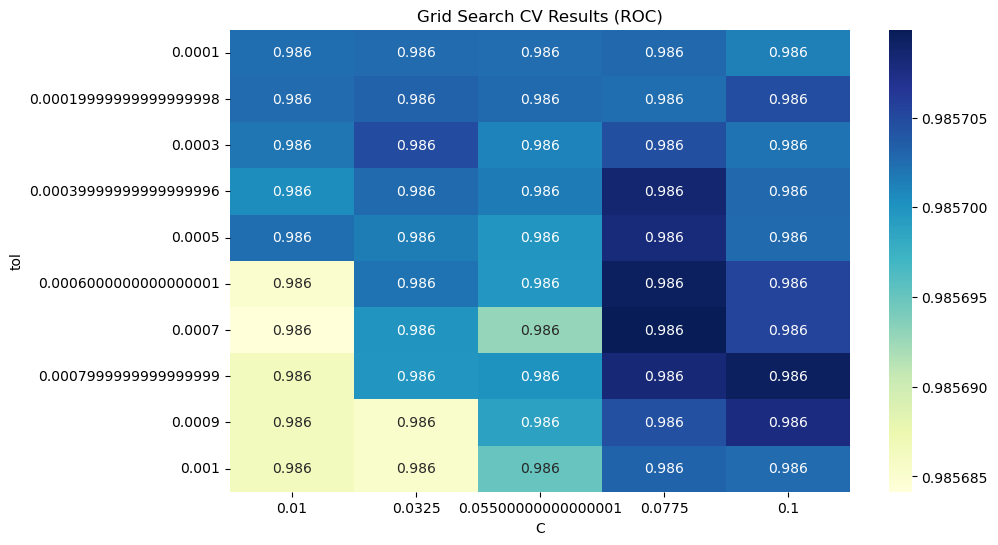

In [ ]:
# Find the best C value with tolerance
param_grid = {'tol': np.linspace(.0001, .001, num=10, dtype=float), 'C': np.linspace(.01, .1, num=5, dtype=float)}

grid_search = GridSearchCV(estimator = LogisticRegression(max_iter = 1000, random_state=1234),
                           param_grid = param_grid,
                           cv=5,
                           scoring='roc_auc_ovo')

grid_search.fit(X_train, y_train)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_tol',
    columns='param_C'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Grid Search CV Results (ROC)')
plt.xlabel('C')
plt.ylabel('tol')
plt.show()


# Final Evaluation

Now that both the logistic regression and random forest have been tuned, let's evaluate the tuned models, comparing them to the base models.

,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1,Training ROC,Eval ROC
0,Base Random Forest,0.999958,0.974958,1.000000,0.979564,0.999917,0.969656,0.999958,0.974585,1.000000,0.994232
1,Tuned Random Forest,0.994699,0.973122,0.999334,0.978542,0.990186,0.967014,0.994739,0.972744,0.999913,0.994569
2,Base Logistic Regression,0.946035,0.945576,0.957300,0.955381,0.936487,0.935000,0.946779,0.945081,0.985928,0.984835
3,Tuned Logistic Regression,0.945910,0.945576,0.957300,0.955381,0.936259,0.935000,0.946662,0.945081,0.985928,0.984835



Training Base Random Forest...


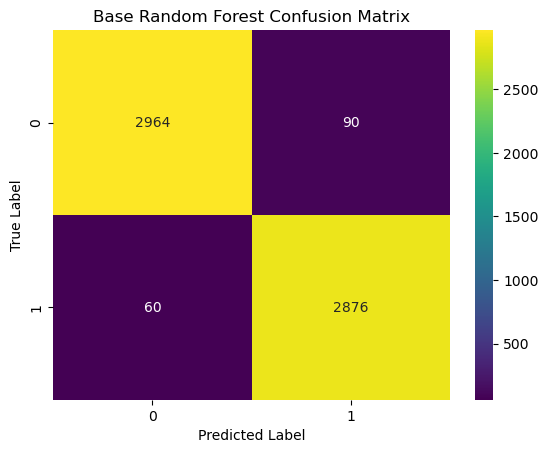

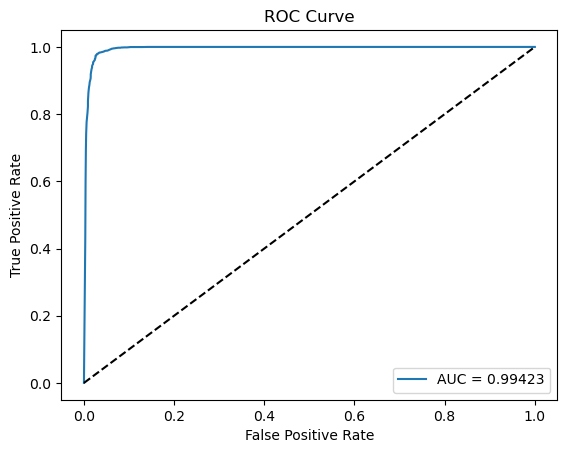


Training Tuned Random Forest...


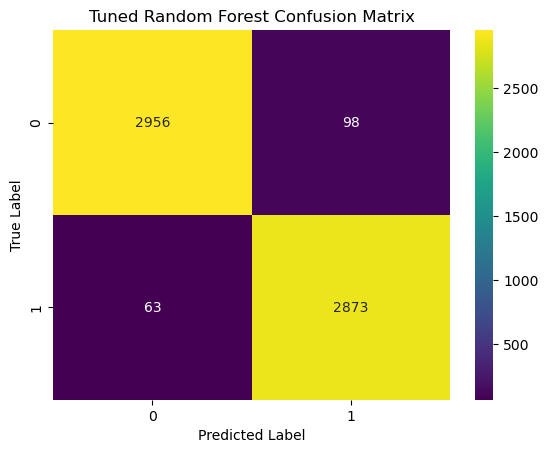

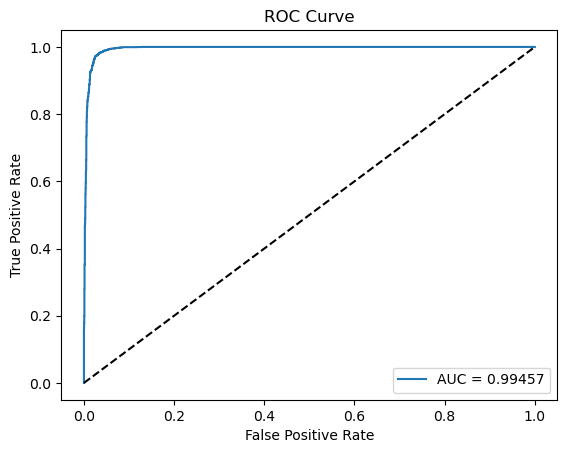


Training Base Logistic Regression...


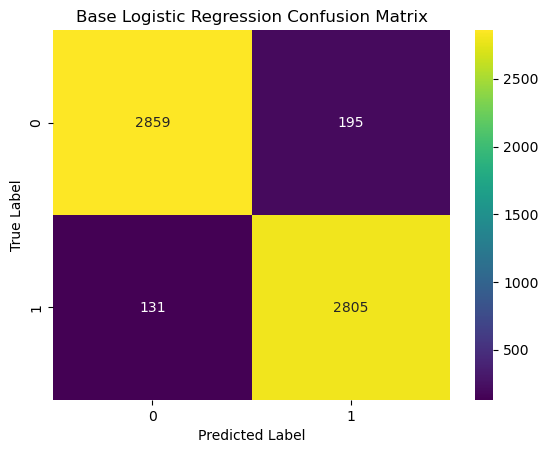

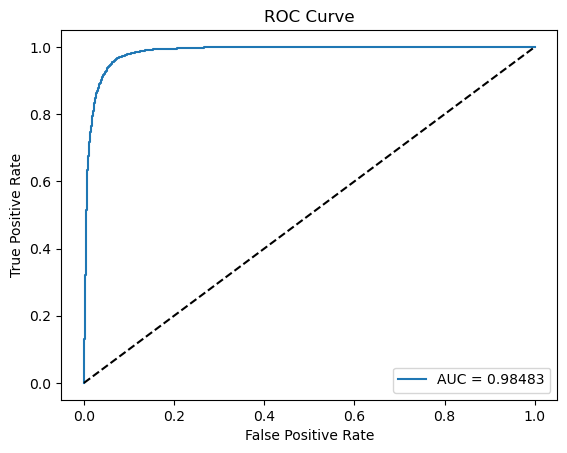


Training Tuned Logistic Regression...


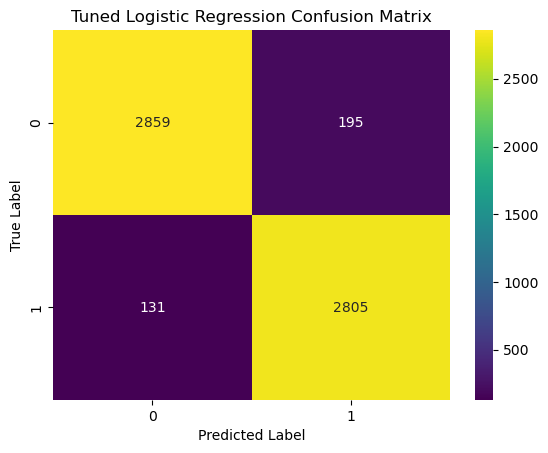

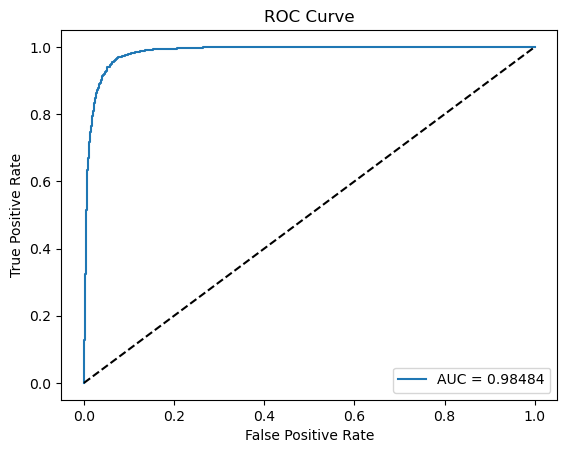

In [ ]:
base_rf = make_pipeline(RandomForestClassifier(random_state = 1234))
tuned_rf = make_pipeline(RandomForestClassifier(random_state = 1234, max_depth = 21, min_samples_leaf = 2))
base_lr = make_pipeline(LogisticRegression(random_state = 1234, max_iter = 10000))
tuned_lr = make_pipeline(LogisticRegression(random_state = 1234, max_iter = 10000, C = 0.1, tol = 0.0008))

evaluate_pipelines([
    ('Base Random Forest', base_rf),
    ('Tuned Random Forest', tuned_rf),
    ('Base Logistic Regression', base_lr),
    ('Tuned Logistic Regression', tuned_lr),
], X_train, y_train, X_test, y_test)

# CLFs to plot confusion matrix for
clfs = [('Base Random Forest', base_rf),
    ('Tuned Random Forest', tuned_rf),
    ('Base Logistic Regression', base_lr),
    ('Tuned Logistic Regression', tuned_lr),]

for name, clf in clfs:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:,1]
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_probs)

Scaling and HP tuning

,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1,Training ROC,Eval ROC
0,Base Random Forest,0.999958,0.974958,1.000000,0.979564,0.999917,0.969656,0.999958,0.974585,1.000000,0.994232
1,Scaled Random Forest,0.999958,0.974958,1.000000,0.979564,0.999917,0.969656,0.999958,0.974585,1.000000,0.994257
2,Base Logistic Regression,0.946035,0.945576,0.957300,0.955381,0.936487,0.935000,0.946779,0.945081,0.985928,0.984835
3,Scaled Logistic Regression,0.945618,0.941569,0.958215,0.953338,0.934947,0.929283,0.946438,0.941157,0.985203,0.983618



Training Base Random Forest...


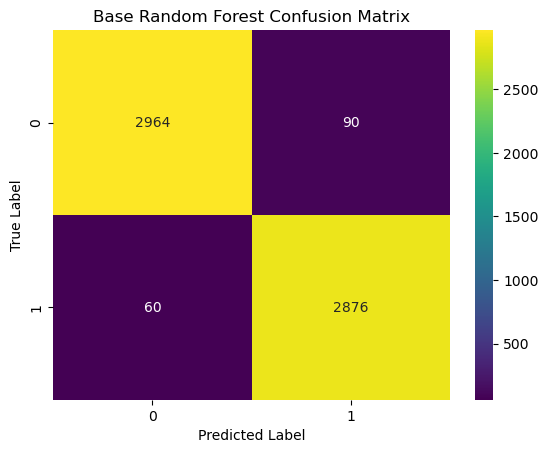

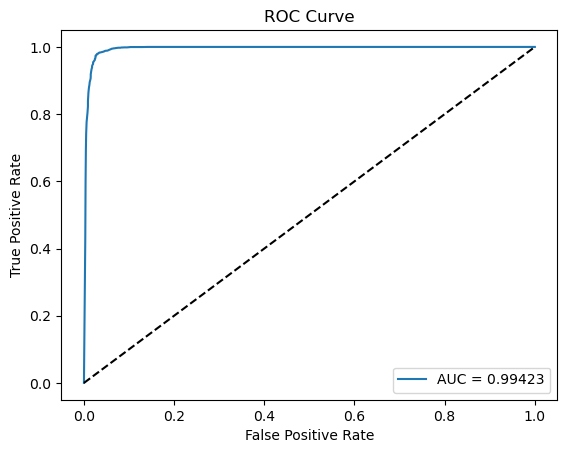


Training Scaled Random Forest...


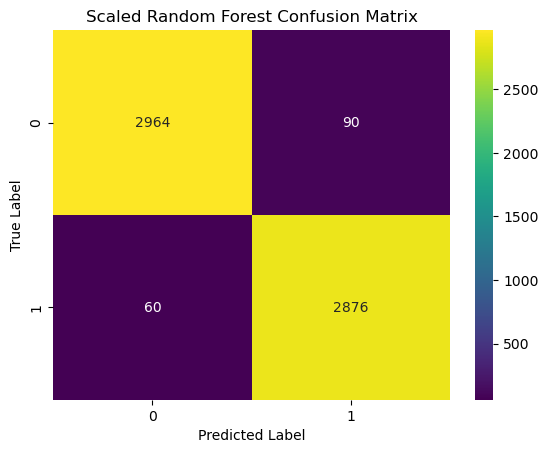

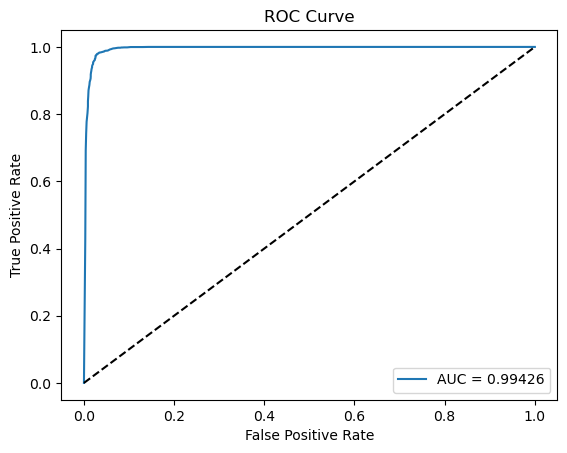


Training Base Logistic Regression...


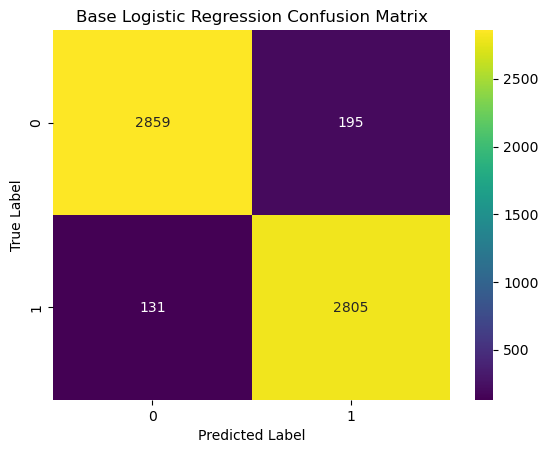

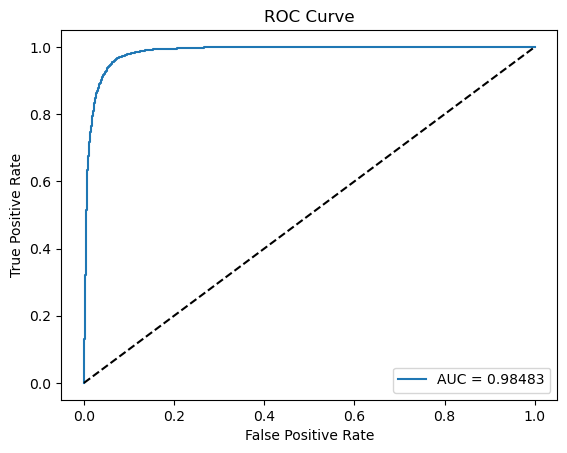


Training Scaled Logistic Regression...


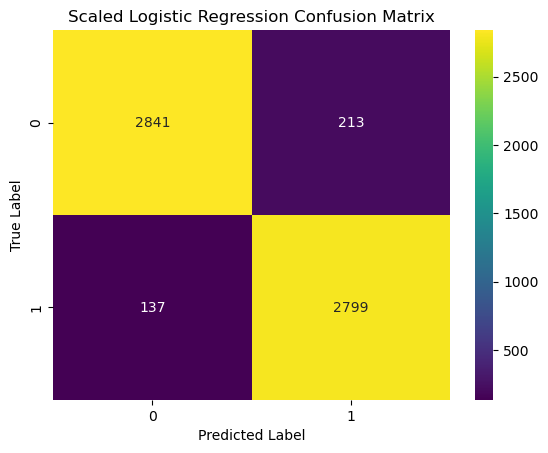

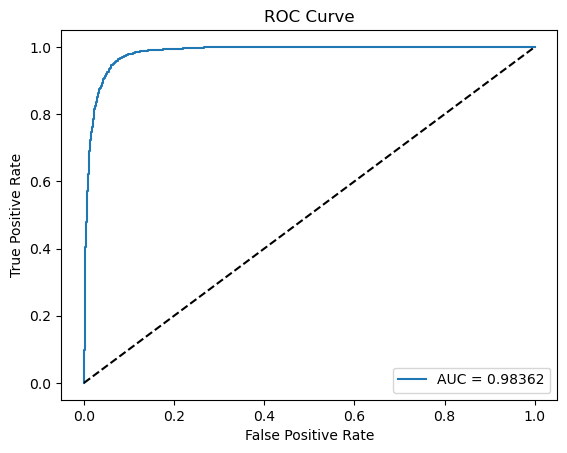

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

base_rf = make_pipeline(RandomForestClassifier(random_state = 1234))
scaled_rf = make_pipeline(scaler, RandomForestClassifier(random_state = 1234))
base_lr = make_pipeline(LogisticRegression(random_state = 1234, max_iter = 10000))
scaled_lr = make_pipeline(scaler, LogisticRegression(random_state = 1234, max_iter = 10000))

evaluate_pipelines([
    ('Base Random Forest', base_rf),
    ('Scaled Random Forest', scaled_rf),
    ('Base Logistic Regression', base_lr),
    ('Scaled Logistic Regression', scaled_lr),
], X_train, y_train, X_test, y_test)

# CLFs to plot confusion matrix for
clfs = [('Base Random Forest', base_rf),
    ('Scaled Random Forest', scaled_rf),
    ('Base Logistic Regression', base_lr),
    ('Scaled Logistic Regression', scaled_lr),]

for name, clf in clfs:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:,1]
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_probs)

Scaled and Tuned Models

,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1,Training ROC,Eval ROC
0,Base Random Forest,0.999958,0.974958,1.000000,0.979564,0.999917,0.969656,0.999958,0.974585,1.000000,0.994232
1,Scaled Random Forest,0.999958,0.974958,1.000000,0.979564,0.999917,0.969656,0.999958,0.974585,1.000000,0.994257
2,Scaled and Tuned Random Forest,0.994699,0.973289,0.999334,0.978202,0.990186,0.967655,0.994739,0.972900,0.999913,0.994572
3,Base Logistic Regression,0.946035,0.945576,0.957300,0.955381,0.936487,0.935000,0.946779,0.945081,0.985928,0.984835
4,Scaled Logistic Regression,0.945618,0.941569,0.958215,0.953338,0.934947,0.929283,0.946438,0.941157,0.985203,0.983618
5,Scaled and Tuned Logistic Regression,0.941277,0.936394,0.962377,0.956744,0.923704,0.917075,0.942644,0.936489,0.983522,0.981595



Training Base Random Forest...


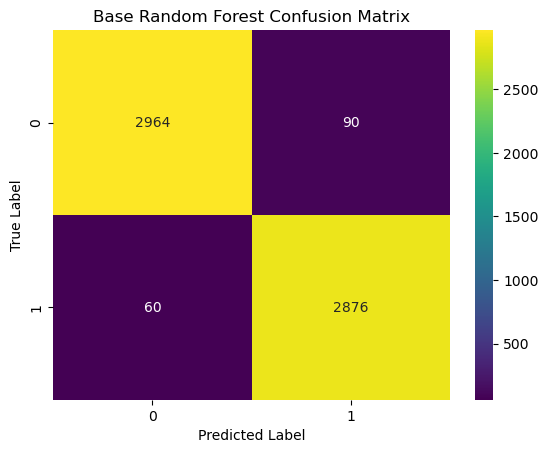

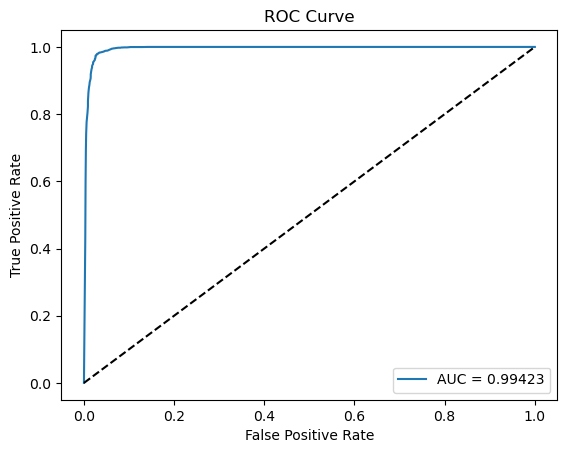


Training Scaled Random Forest...


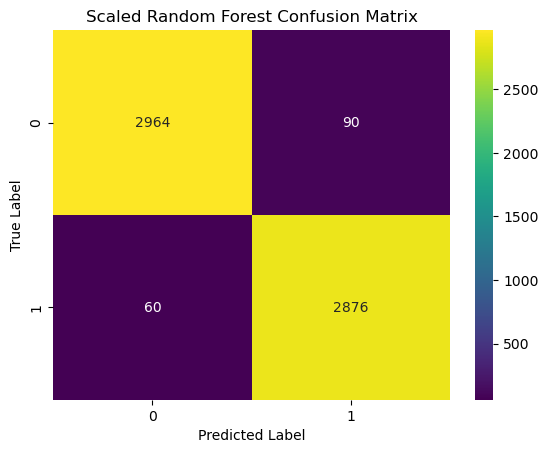

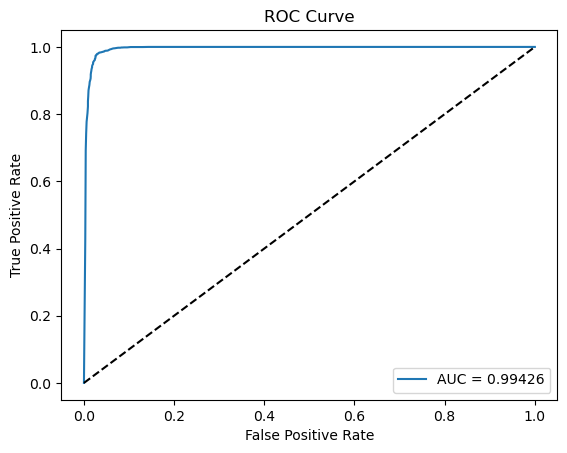


Training Scaled and Tuned Random Forest...


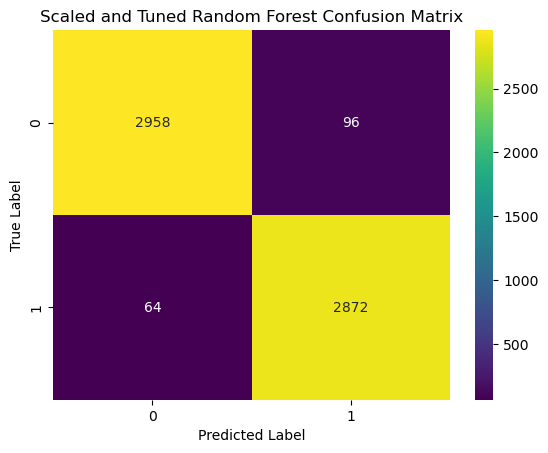

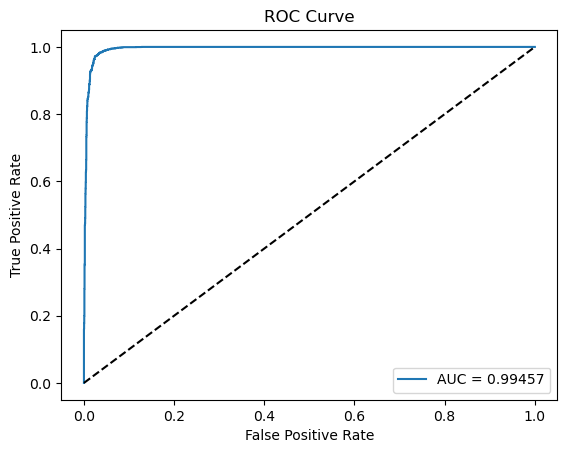


Training Base Logistic Regression...


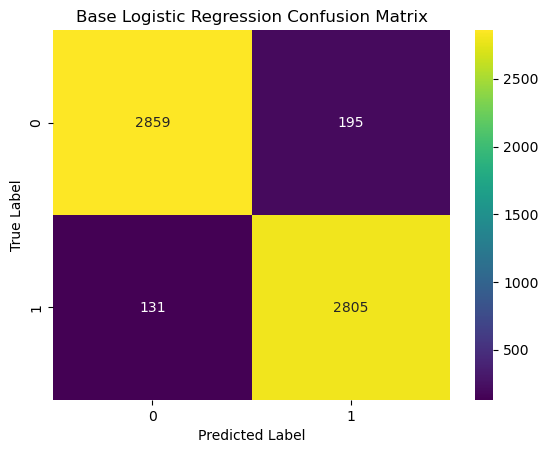

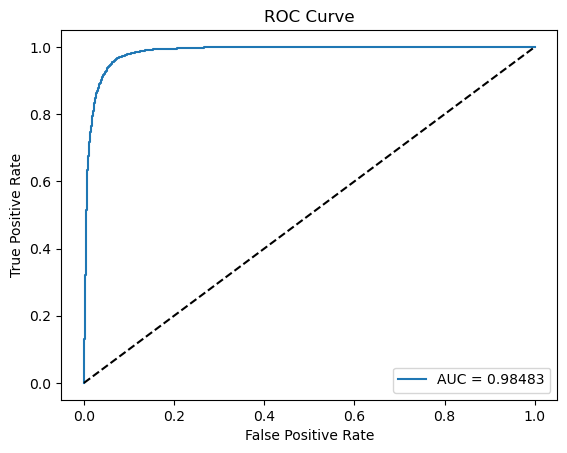


Training Scaled Logistic Regression...


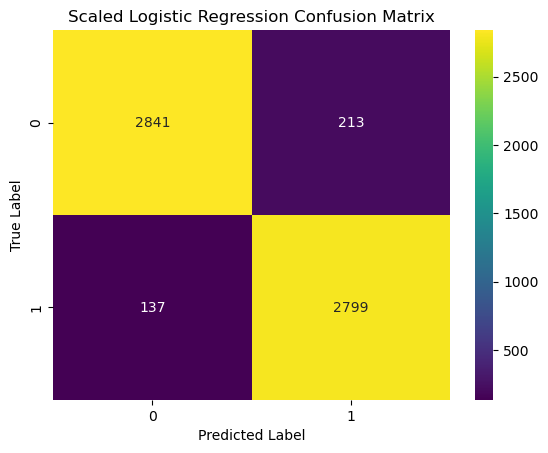

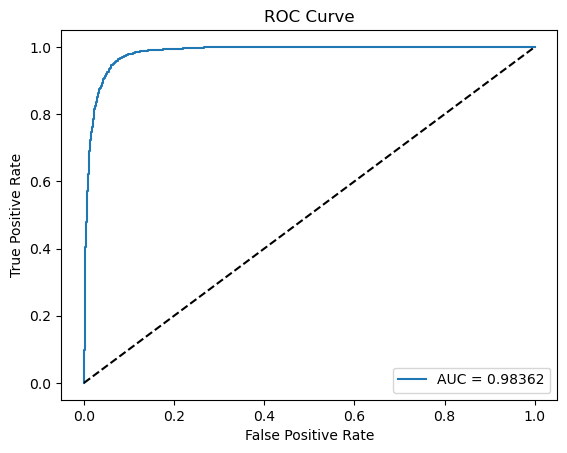


Training Scaled and Tuned Random Forest...


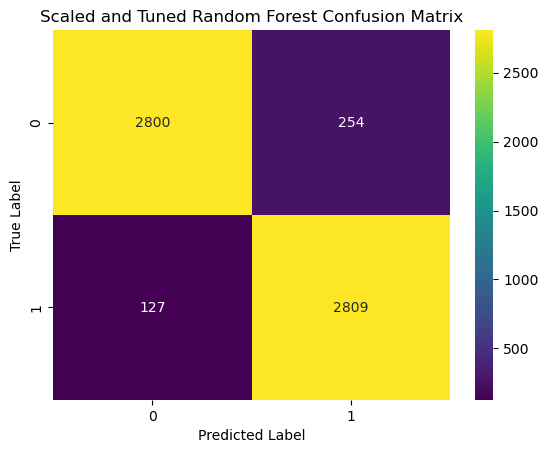

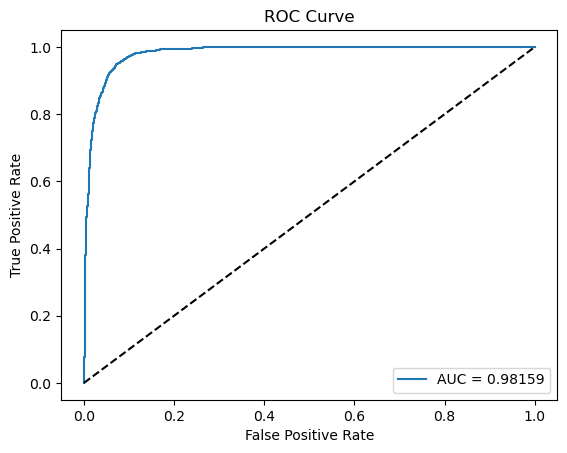

In [ ]:
tuned_rf = make_pipeline(scaler, RandomForestClassifier(random_state = 1234, max_depth = 21, min_samples_leaf = 2))
tuned_lr = make_pipeline(scaler, LogisticRegression(random_state = 1234, max_iter = 10000, C = 0.1, tol = 0.0008))

evaluate_pipelines([
    ('Base Random Forest', base_rf),
    ('Scaled Random Forest', scaled_rf),
    ('Scaled and Tuned Random Forest', tuned_rf),
    ('Base Logistic Regression', base_lr),
    ('Scaled Logistic Regression', scaled_lr),
    ('Scaled and Tuned Logistic Regression', tuned_lr)
], X_train, y_train, X_test, y_test)

# CLFs to plot confusion matrix for
clfs = [('Base Random Forest', base_rf),
    ('Scaled Random Forest', scaled_rf),
    ('Scaled and Tuned Random Forest', tuned_rf),
    ('Base Logistic Regression', base_lr),
    ('Scaled Logistic Regression', scaled_lr),
    ('Scaled and Tuned Random Forest', tuned_lr)
]

for name, clf in clfs:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:,1]
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_probs)

# Summary

Using crossvalidation to tune the hyperparameters of random forest and logistic regression models, we note very small improvements over the ROC_AUC score for both models. However, these very slight improvements came at a tradeoff of slightly worse performance on other metrics (accuracy, recall, precision, and F1).

Given the novelty of our problem, I would argue that the tradeoff for slightly worse performance on most metrics for increased ROC performance is a worthwhile tradeoff. At the end of the day, our main contribution/goal for this problem is to forecase risk levels for wildfire outbreak. This is well modeled by a 'probability' score which translates to risk of fire outbreak for a given day.

Additionally, we note that the random forest has better performance across the board compared to logistic regression.

## Feature improtance

In [ ]:
# RANDOM FOREST
from sklearn.inspection import permutation_importance
perm = permutation_importance(
    estimator = tuned_rf,
    X         = X_test,
    y         = y_test,
    n_repeats = 15,
    scoring   = 'roc_auc',
    random_state = 1234,
    n_jobs    = -1,
)

# Put into a tidy DataFrame
perm_df = (pd.DataFrame({'Feature': X_test.columns,
                         'Importance': perm.importances_mean})
             .sort_values('Importance', ascending=False))

perm_df

,Feature,Importance
8,PS,0.126652
0,Latitude,0.062017
1,Longitude,0.040828
7,RH2M,0.002160
4,T2M_MAX,0.002127
2,WS2M,0.001941
3,T2M,0.001543
6,T2MDEW,0.001336
5,T2M_MIN,0.000806
11,ALLSKY_SFC_SW_DIFF,0.000803


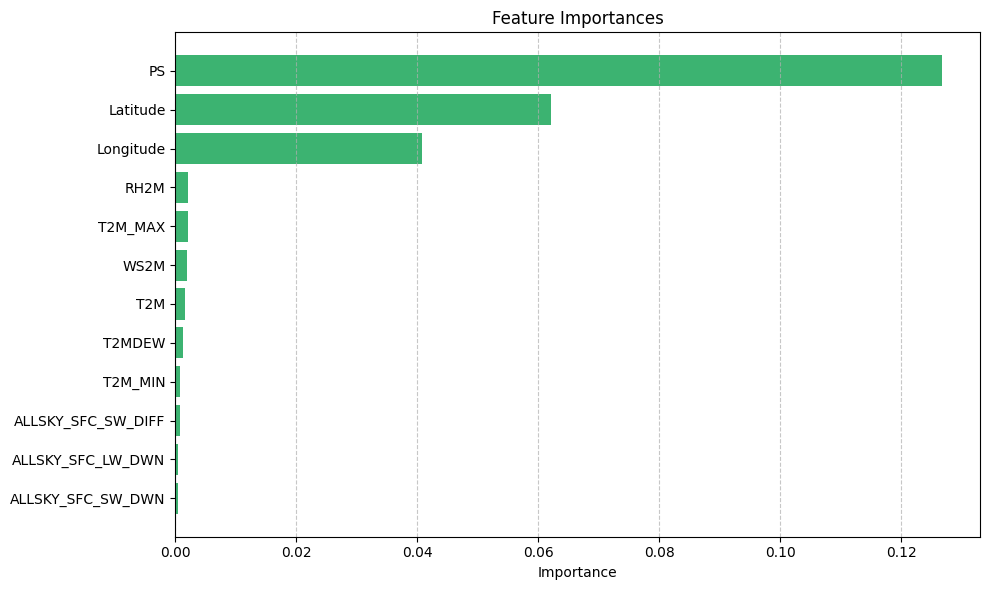

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data
data = {
    'Feature': [
        'PS', 'Latitude', 'Longitude', 'RH2M', 'T2M_MAX',
        'WS2M', 'T2M', 'T2MDEW', 'T2M_MIN', 'ALLSKY_SFC_SW_DIFF',
        'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_SW_DWN'
    ],
    'Importance': [
        0.126652, 0.062017, 0.040828, 0.002160, 0.002127,
        0.001941, 0.001543, 0.001336, 0.000806, 0.000803,
        0.000474, 0.000384
    ]
}

# Create DataFrame and sort by importance
df = pd.DataFrame(data)
df_sorted = df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Feature'], df_sorted['Importance'], color='mediumseagreen')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# LOGISTIC REGRESSION
perm = permutation_importance(
    estimator = tuned_lr,
    X         = X_test,
    y         = y_test,
    n_repeats = 15,
    scoring   = 'roc_auc',
    random_state = 1234,
    n_jobs    = -1,
)

# Put into a tidy DataFrame
perm_df = (pd.DataFrame({'Feature': X_test.columns,
                         'Importance': perm.importances_mean})
             .sort_values('Importance', ascending=False))

perm_df

,Feature,Importance
8,PS,0.391858
1,Longitude,0.019699
7,RH2M,0.006435
0,Latitude,0.004075
6,T2MDEW,0.002554
4,T2M_MAX,0.001880
3,T2M,0.001194
5,T2M_MIN,0.000581
11,ALLSKY_SFC_SW_DIFF,0.000035
10,ALLSKY_SFC_SW_DWN,0.000013


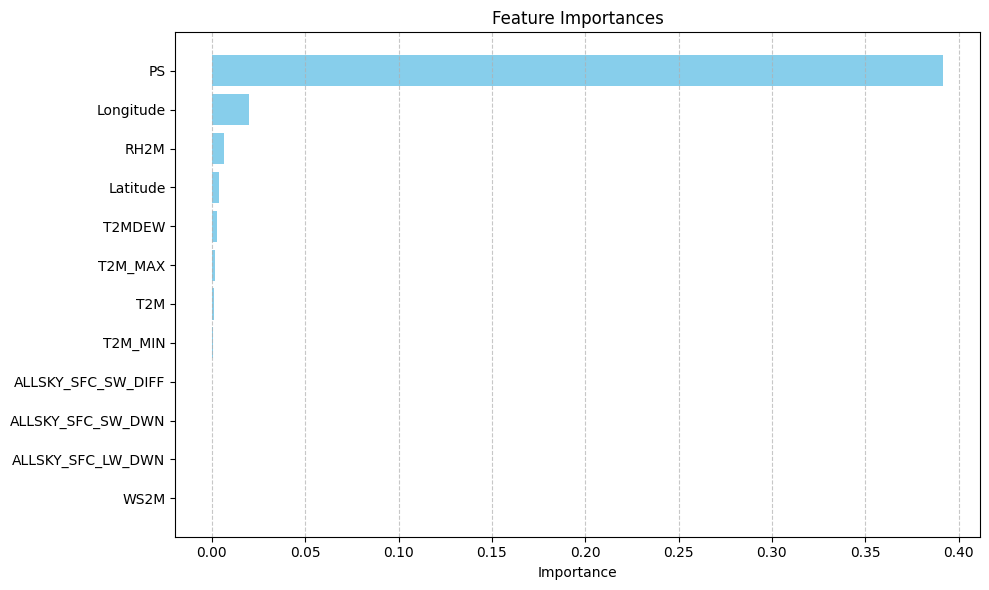

In [2]:
## Creating a graph of feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = {
    'Feature': [
        'PS', 'Longitude', 'RH2M', 'Latitude', 'T2MDEW', 'T2M_MAX',
        'T2M', 'T2M_MIN', 'ALLSKY_SFC_SW_DIFF', 'ALLSKY_SFC_SW_DWN',
        'ALLSKY_SFC_LW_DWN', 'WS2M'
    ],
    'Importance': [
        0.391858, 0.019699, 0.006435, 0.004075, 0.002554,
        0.001880, 0.001194, 0.000581, 0.000035, 0.000013,
        0.000004, -0.000005
    ]
}

# Create DataFrame and sort by importance
df = pd.DataFrame(data)
df_sorted = df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Feature'], df_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

